### Importing the libraries and file needed for the project

In [365]:
import requests
import lxml.html as lh
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3
#!conda install -c conda-forge folium=0.5.0 --yes 
import folium
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import json
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline 

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


body = client_7a207381b1af4d15b126270709dfd5b8.get_object(Bucket='courseracapstoneproject-donotdelete-pr-x1dwa7gkvsd5xa',Key='joaoPessoaDatav2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_lat_long = pd.read_csv(body)
df_lat_long.head()

,Nome,Latitude,Longitude
0,Água Fria,-7.160460,-34.857822
1,Aeroclube,-7.093488,-34.843105
2,Altiplano,-7.130010,-34.826477
3,Alto do Céu,-7.094047,-34.862049
4,Alto do Mateus,-7.137515,-34.911442


### Getting data with the neghborhoods' names, zones and population

In [156]:
url='https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Jo%C3%A3o_Pessoa'
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')

### Transforming the data and turn it into a dataframe

In [157]:
tr_elements = doc.xpath('//tr')
col=[]
i=0
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"Nome
"
2:"Zona
"
3:"População[3]
"


In [158]:
for j in range(1,len(tr_elements)):
    T=tr_elements[j]

    if len(T)!=3:
        break
    
    i=0
    
    for t in T.iterchildren():
        data=t.text_content() 

        col[i][1].append(data)

        i+=1

In [159]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [160]:
df = df.rename(columns={'Nome\n':'Nome1','Zona\n':'Zona','População[3]\n': 'População'})
df['População'] = df['População'].str[:-1]
df

,Nome1,Zona,População
0,Água Fria,Sul,6.269
1,Aeroclube,Leste,9.649
2,Altiplano,Leste,5.233
3,Alto do Céu,Norte,16.557
4,Alto do Mateus,Oeste,16.281
5,Anatólia,Sul,1.162
6,Bairro das Indústrias,Sul,8.712
7,Bairro dos Estados,Norte,7.458
8,Bairro dos Ipês,Norte,9.121
9,Bairro dos Novais,Oeste,–


### Concatenating url data with file data

In [161]:
result = pd.concat([df, df_lat_long], axis=1, join='inner')

In [162]:
result = result.drop(result.columns[3],axis=1)
result = result.drop(result.columns[2],axis=1)
result = result.rename(columns={'Nome1':'Nome'})
result

,Nome,Zona,Latitude,Longitude
0,Água Fria,Sul,-7.160460,-34.857822
1,Aeroclube,Leste,-7.093488,-34.843105
2,Altiplano,Leste,-7.130010,-34.826477
3,Alto do Céu,Norte,-7.094047,-34.862049
4,Alto do Mateus,Oeste,-7.137515,-34.911442
5,Anatólia,Sul,-7.148797,-34.844028
6,Bairro das Indústrias,Sul,-7.179576,-34.920059
7,Bairro dos Estados,Norte,-7.113548,-34.855289
8,Bairro dos Ipês,Norte,-7.100655,-34.855028
9,Bairro dos Novais,Oeste,-7.152174,-34.902898


### Creating João Pessoa Map

In [163]:
address = 'João Pessoa, PB'

geolocator = Nominatim(user_agent="jampa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of João Pessoa are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of João Pessoa are -7.1215981, -34.882028.


In [164]:
map_joaoPessoa = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, zone, neighborhood in zip(result['Latitude'], result['Longitude'], result['Zona'], result['Nome']):
    label = '{}, {}'.format(neighborhood, zone)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_joaoPessoa)  
    
map_joaoPessoa

In [166]:
CLIENT_ID = '###' 
CLIENT_SECRET = '###' 
VERSION = '20180605'

### Creating a dataframe for wach zone

In [167]:
north_data = result[result['Zona'] == 'Norte'].reset_index(drop=True)
east_data = result[result['Zona'] == 'Leste'].reset_index(drop=True)
south_data = result[result['Zona'] == 'Sul'].reset_index(drop=True)
west_data = result[result['Zona'] == 'Oeste'].reset_index(drop=True)

In [168]:
north_data

,Nome,Zona,Latitude,Longitude
0,Alto do Céu,Norte,-7.094047,-34.862049
1,Bairro dos Estados,Norte,-7.113548,-34.855289
2,Bairro dos Ipês,Norte,-7.100655,-34.855028
3,Centro,Norte,-7.118065,-34.885101
4,Expedicionários,Norte,-7.123582,-34.852798
5,Jardim 13 de Maio,Norte,-7.155107,-34.836449
6,Jardim Esther,Norte,-7.149833,-34.848005
7,Jardim Mangueira,Norte,-7.172726,-34.856438
8,Mandacaru,Norte,-7.208533,-34.926989
9,Padre Zé,Norte,-7.160700,-34.799488


In [169]:
east_data

,Nome,Zona,Latitude,Longitude
0,Aeroclube,Leste,-7.093488,-34.843105
1,Altiplano,Leste,-7.130010,-34.826477
2,Bessa,Leste,-7.067366,-34.843179
3,Brisamar,Leste,-7.112412,-34.841278
4,Cabo Branco,Leste,-7.135341,-34.819697
5,Castelo Branco,Leste,-7.136296,-34.841534
6,Jardim Luna,Leste,-7.158938,-34.908272
7,Jardim Oceania,Leste,-7.107052,-34.842197
8,João Agripino,Leste,-7.142082,-34.862484
9,Manaíra,Leste,-7.175241,-34.940293


In [170]:
south_data

,Nome,Zona,Latitude,Longitude
0,Água Fria,Sul,-7.160460,-34.857822
1,Anatólia,Sul,-7.148797,-34.844028
2,Bairro das Indústrias,Sul,-7.179576,-34.920059
3,Bancários,Sul,-7.146037,-34.840908
4,Barra de Gramame,Sul,-7.218753,-34.811766
5,Cidade dos Colibris,Sul,-7.156487,-34.845448
6,Costa do Sol,Sul,-7.180279,-34.816208
7,Costa e Silva,Sul,-7.174559,-34.898197
8,Cristo Redentor,Sul,-7.159385,-34.875733
9,Cuiá,Sul,-7.183323,-34.862457


In [171]:
west_data

,Nome,Zona,Latitude,Longitude
0,Alto do Mateus,Oeste,-7.137515,-34.911442
1,Bairro dos Novais,Oeste,-7.152174,-34.902898
2,Cruz das Armas,Oeste,-7.143374,-34.885933
3,Ilha do Bispo,Oeste,-7.128134,-34.901813
4,Jaguaribe,Oeste,-7.136133,-34.876923
5,Jardim Planalto,Oeste,-7.176936,-34.879031
6,Jardim Veneza,Oeste,-7.104970,-34.861098
7,Mata do Buraquinho,Oeste,-7.155616,-34.901329
8,Oitizeiro,Oeste,-7.196593,-34.857933
9,Rangel,Oeste,-7.115024,-34.877529


### Beginning north zone analysis

In [172]:
#address = 'North Zone, João Pessoa'
latitude_north_zone = north_data['Latitude'].mean()
longitude_north_zone = north_data['Longitude'].mean()
print('The geograpical coordinate of North Zone are {}, {}.'.format(latitude_north_zone, longitude_north_zone))

The geograpical coordinate of North Zone are -7.14076789023766, -34.85651052676908.


In [173]:
map_north_zone = folium.Map(location=[latitude_north_zone, longitude_north_zone], zoom_start=11)

# add markers to map
for lat, lng, label in zip(north_data['Latitude'], north_data['Longitude'], north_data['Nome']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_north_zone)  
    
map_north_zone

###  Getting nearby venues of a determined Neighbourhood

In [174]:
north_data.loc[0, 'Nome']

'Alto do Céu'

In [208]:
north_neighborhood_latitude = north_data.loc[0, 'Latitude'] 
north_neighborhood_longitude = north_data.loc[0, 'Longitude'] 

north_neighborhood_name = north_data.loc[0, 'Nome'] 

print('Latitude and longitude values of {} are {}, {}.'.format(north_neighborhood_name, 
                                                               north_neighborhood_latitude, 
                                                               north_neighborhood_longitude))

Latitude and longitude values of Alto do Céu are -7.094046592712402, -34.862049102783196.


In [216]:
LIMIT = 100
radius = 500
url_foursquare_north = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    north_neighborhood_latitude, 
    north_neighborhood_longitude, 
    radius, 
    LIMIT)
url_foursquare_north

'https://api.foursquare.com/v2/venues/explore?&client_id=H4JL4VVIDPE3M5GBUVUNPZJEJ5S0DSMXQ0KRPY5VHZUDCWX3&client_secret=0C3GY5CF5K5JYNWFQQF31J2DPXQ5CJ52MHM5XIKASNNVTI3B&v=20180605&ll=-7.094046592712402,-34.862049102783196&radius=500&limit=100'

In [220]:
req_north = requests.get(url_foursquare_north).json()
req_north

{'meta': {'code': 200, 'requestId': '5e44d5ec40a7ea001bd83e9f'},
 'response': {'headerLocation': 'João Pessoa',
  'headerFullLocation': 'João Pessoa',
  'headerLocationGranularity': 'city',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': -7.089546588212398,
    'lng': -34.85752285083183},
   'sw': {'lat': -7.098546597212406, 'lng': -34.866575354734564}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '53dea5af498e26a926fa00d6',
       'name': 'lanchonete da Darc',
       'location': {'address': 'R. Profa. Luiza Ramalho,84',
        'lat': -7.097317035411314,
        'lng': -34.86237048018466,
        'labeledLatLngs': [{'label': 'display',
          'lat': -7.097317035411314,
          'lng': -34.86237048018466}],
        'distance': 365,
        'postalCode': '

In [178]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [251]:
venues_north = req_north['response']['groups'][0]['items']
    
nearby_venues_north = json_normalize(venues_north) # flatten JSON

# filter columns
filtered_columns_north = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_north =nearby_venues_north.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_north['venue.categories'] = nearby_venues_north.apply(get_category_type, axis=1)

# clean columns
nearby_venues_north.columns = [col.split(".")[-1] for col in nearby_venues_north.columns]

nearby_venues_north

,name,categories,lat,lng
0,lanchonete da Darc,Sandwich Place,-7.097317,-34.862370
1,1 Tempo,Breakfast Spot,-7.094214,-34.863537
2,Lanchonete da Benção de Deus,Snack Place,-7.095227,-34.863352
3,Caverna Copiadora,Paper / Office Supplies Store,-7.095453,-34.862215
4,Frigorifico União,Steakhouse,-7.097538,-34.863750
5,SALAO POPULAR,Cosmetics Shop,-7.098357,-34.862155
6,Celular Win,Electronics Store,-7.098436,-34.862312
7,Estação Mandacaru (CBTU),Train Station,-7.098488,-34.862667


In [180]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

8 venues were returned by Foursquare.


### Getting nearby venues of all the Neighbourhoods from the North Zone

In [181]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [182]:
north_zone_venues = getNearbyVenues(names=north_data['Nome'],
                                   latitudes=north_data['Latitude'],
                                   longitudes=north_data['Longitude']
                                  )

Alto do Céu
Bairro dos Estados
Bairro dos Ipês
Centro
Expedicionários
Jardim 13 de Maio
Jardim Esther
Jardim Mangueira
Mandacaru
Padre Zé
Pedro Gondim
Róger
Tambiá


In [183]:
print(north_zone_venues.shape)
north_zone_venues.head()

(346, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alto do Céu,-7.094047,-34.862049,lanchonete da Darc,-7.097317,-34.862370,Sandwich Place
1,Alto do Céu,-7.094047,-34.862049,1 Tempo,-7.094214,-34.863537,Breakfast Spot
2,Alto do Céu,-7.094047,-34.862049,Lanchonete da Benção de Deus,-7.095227,-34.863352,Snack Place
3,Alto do Céu,-7.094047,-34.862049,Caverna Copiadora,-7.095453,-34.862215,Paper / Office Supplies Store
4,Alto do Céu,-7.094047,-34.862049,Frigorifico União,-7.097538,-34.863750,Steakhouse


### Counting Neighbourhood appearances

In [184]:
north_zone_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alto do Céu,8,8,8,8,8,8
Bairro dos Estados,24,24,24,24,24,24
Bairro dos Ipês,11,11,11,11,11,11
Centro,78,78,78,78,78,78
Expedicionários,37,37,37,37,37,37
Jardim 13 de Maio,35,35,35,35,35,35
Jardim Esther,35,35,35,35,35,35
Jardim Mangueira,12,12,12,12,12,12
Padre Zé,8,8,8,8,8,8


In [185]:
print('There are {} uniques categories.'.format(len(north_zone_venues['Venue Category'].unique())))

There are 107 uniques categories.


### Adding venues as columns to dataframe

In [186]:
north_zone_onehot = pd.get_dummies(north_zone_venues[['Venue Category']], prefix="", prefix_sep="")

north_zone_onehot['Neighborhood'] = north_zone_venues['Neighborhood'] 

fixed_columns_north = [north_zone_onehot.columns[-1]] + list(north_zone_onehot.columns[:-1])
north_zone_onehot = north_zone_onehot[fixed_columns_north]

north_zone_onehot.head()

,Neighborhood,Acai House,American Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Tailor Shop,Tea Room,Theater,Thrift / Vintage Store,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Women's Store,Yoga Studio
0,Alto do Céu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alto do Céu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alto do Céu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alto do Céu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alto do Céu,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
north_zone_onehot.shape

(346, 108)

### Grouping by Neighborhoods from the north zone

In [192]:
north_zone_grouped = north_zone_onehot.groupby('Neighborhood').mean().reset_index()
north_zone_grouped

,Neighborhood,Acai House,American Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Tailor Shop,Tea Room,Theater,Thrift / Vintage Store,Train Station,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Women's Store,Yoga Studio
0,Alto do Céu,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bairro dos Estados,0.041667,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.083333,0.083333,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.041667,0.041667
2,Bairro dos Ipês,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.181818,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Centro,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,...,0.000000,0.012821,0.012821,0.012821,0.000,0.000000,0.000000,0.012821,0.012821,0.000000
4,Expedicionários,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.054054,0.027027,0.135135,...,0.000000,0.000000,0.000000,0.000000,0.000,0.027027,0.027027,0.000000,0.000000,0.000000
5,Jardim 13 de Maio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.028571,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Jardim Esther,0.057143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085714,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Jardim Mangueira,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Padre Zé,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Pedro Gondim,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.076923,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000


In [190]:
north_zone_grouped.shape

(12, 108)

In [193]:
num_top_venues = 5

for hood in north_zone_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = north_zone_grouped[north_zone_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alto do Céu----
            venue  freq
0     Snack Place  0.12
1   Train Station  0.12
2  Cosmetics Shop  0.12
3      Steakhouse  0.12
4  Sandwich Place  0.12


----Bairro dos Estados----
        venue  freq
0   BBQ Joint  0.08
1      Bakery  0.08
2         Gym  0.08
3  Acai House  0.04
4      Buffet  0.04


----Bairro dos Ipês----
           venue  freq
0            Bar  0.18
1         Bakery  0.18
2       Bus Stop  0.09
3  Grocery Store  0.09
4    Beer Garden  0.09


----Centro----
                    venue  freq
0                   Plaza  0.06
1              Restaurant  0.05
2  Furniture / Home Store  0.05
3             Art Gallery  0.04
4                  Church  0.04


----Expedicionários----
         venue  freq
0       Bakery  0.14
1   Restaurant  0.08
2     Pharmacy  0.05
3  Auto Garage  0.05
4          Gym  0.05


----Jardim 13 de Maio----
         venue  freq
0          Gym  0.14
1     Pharmacy  0.11
2    Pet Store  0.11
3  Snack Place  0.06
4  Pizza Place  0.06


----Ja

In [194]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [198]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
north_zone_venues_sorted = pd.DataFrame(columns=columns)
north_zone_venues_sorted['Neighborhood'] = north_zone_grouped['Neighborhood']

for ind in np.arange(north_zone_grouped.shape[0]):
    north_zone_venues_sorted.iloc[ind, 1:] = return_most_common_venues(north_zone_grouped.iloc[ind, :], num_top_venues)

north_zone_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alto do Céu,Electronics Store,Paper / Office Supplies Store,Sandwich Place,Snack Place,Train Station,Cosmetics Shop,Steakhouse,Breakfast Spot,Department Store,Dessert Shop
1,Bairro dos Estados,BBQ Joint,Bakery,Gym,Yoga Studio,Dessert Shop,Pharmacy,Northeastern Brazilian Restaurant,Market,Women's Store,Buffet
2,Bairro dos Ipês,Bakery,Bar,Snack Place,Bus Stop,Beer Garden,Health & Beauty Service,Grocery Store,Arts & Crafts Store,Gym,Dance Studio
3,Centro,Plaza,Furniture / Home Store,Restaurant,Art Gallery,Church,Buffet,Shopping Mall,Music Venue,Motorcycle Shop,Brazilian Restaurant
4,Expedicionários,Bakery,Restaurant,Auto Garage,Gym,Pharmacy,Bar,Plaza,Buffet,Burger Joint,Café


### Beginning east zone analysis

In [199]:
#address = 'East Zone, João Pessoa'
latitude_east_zone = east_data['Latitude'].mean()
longitude_east_zone = east_data['Longitude'].mean()
print('The geograpical coordinate of East Zone are {}, {}.'.format(latitude_east_zone, longitude_east_zone))

The geograpical coordinate of East Zone are -7.127854411760797, -34.85866615101726.


In [202]:
map_east_zone = folium.Map(location=[latitude_east_zone, longitude_east_zone], zoom_start=11)

# add markers to map
for lat, lng, label in zip(east_data['Latitude'], east_data['Longitude'], east_data['Nome']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_east_zone)  
    
map_east_zone

In [205]:
east_data.loc[0, 'Nome']

'Aeroclube'

In [210]:
east_neighborhood_latitude = east_data.loc[0, 'Latitude'] 
east_neighborhood_longitude = east_data.loc[0, 'Longitude'] 

east_neighborhood_name = east_data.loc[0, 'Nome'] 

print('Latitude and longitude values of {} are {}, {}.'.format(east_neighborhood_name, 
                                                               east_neighborhood_latitude, 
                                                               east_neighborhood_longitude))

Latitude and longitude values of Aeroclube are -7.093487739562987, -34.84310531616211.


In [213]:
LIMIT = 100
radius = 500
url_foursquare_east = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    east_neighborhood_latitude, 
    east_neighborhood_longitude, 
    radius, 
    LIMIT)
url_foursquare_east

'https://api.foursquare.com/v2/venues/explore?&client_id=H4JL4VVIDPE3M5GBUVUNPZJEJ5S0DSMXQ0KRPY5VHZUDCWX3&client_secret=0C3GY5CF5K5JYNWFQQF31J2DPXQ5CJ52MHM5XIKASNNVTI3B&v=20180605&ll=-7.093487739562987,-34.84310531616211&radius=500&limit=100'

In [219]:
req_east = requests.get(url_foursquare_east).json()
req_east

{'meta': {'code': 200, 'requestId': '5e44d6d677af03001ba57989'},
 'response': {'headerLocation': 'João Pessoa',
  'headerFullLocation': 'João Pessoa',
  'headerLocationGranularity': 'city',
  'totalResults': 15,
  'suggestedBounds': {'ne': {'lat': -7.088987735062983,
    'lng': -34.83857906970482},
   'sw': {'lat': -7.0979877440629915, 'lng': -34.8476315626194}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5585da8e498eb326a07079e5',
       'name': 'Pizza Mestre',
       'location': {'address': 'R. Herberto Pereira de Lucena, 208',
        'lat': -7.094531876235432,
        'lng': -34.841492914979746,
        'labeledLatLngs': [{'label': 'display',
          'lat': -7.094531876235432,
          'lng': -34.841492914979746}],
        'distance': 212,
        'postalCode

In [250]:
venues_east = req_east['response']['groups'][0]['items']
    
nearby_venues_east = json_normalize(venues_east) # flatten JSON

# filter columns
filtered_columns_east = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_east =nearby_venues_east.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_east['venue.categories'] = nearby_venues_east.apply(get_category_type, axis=1)

# clean columns
nearby_venues_east.columns = [col.split(".")[-1] for col in nearby_venues_east.columns]

nearby_venues_east

,name,categories,lat,lng
0,Pizza Mestre,Pizza Place,-7.094532,-34.841493
1,Aeroclube da Paraíba,Airport,-7.092121,-34.842543
2,O Boticário,Cosmetics Shop,-7.091452,-34.846577
3,Coffee Shop São Braz,Coffee Shop,-7.091543,-34.846680
4,Drogarias Big Ben,Pharmacy,-7.097763,-34.842710
5,Cacau Show,Chocolate Shop,-7.091537,-34.846582
6,Skate Plaza,Skate Park,-7.097454,-34.843676
7,Praça de Alimentação,Restaurant,-7.091468,-34.846839
8,Zeny,Dessert Shop,-7.091529,-34.846526
9,Beautiful Hair,Salon / Barbershop,-7.091266,-34.846657


In [254]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_east.shape[0]))

15 venues were returned by Foursquare.


### Getting nearby venues of all the Neighbourhoods from the East Zone

In [259]:
east_zone_venues = getNearbyVenues(names=east_data['Nome'],
                                   latitudes=east_data['Latitude'],
                                   longitudes=east_data['Longitude']
                                  )

Aeroclube
Altiplano
Bessa
Brisamar
Cabo Branco
Castelo Branco
Jardim Luna
Jardim Oceania
João Agripino
Manaíra
Miramar
Penha
Ponta dos Seixas
Portal do Sol
Quadramares[4]
São José
Tambaú
Tambauzinho


In [260]:
print(east_zone_venues.shape)
east_zone_venues.head()

(326, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aeroclube,-7.093488,-34.843105,Pizza Mestre,-7.094532,-34.841493,Pizza Place
1,Aeroclube,-7.093488,-34.843105,Aeroclube da Paraíba,-7.092121,-34.842543,Airport
2,Aeroclube,-7.093488,-34.843105,O Boticário,-7.091452,-34.846577,Cosmetics Shop
3,Aeroclube,-7.093488,-34.843105,Coffee Shop São Braz,-7.091543,-34.846680,Coffee Shop
4,Aeroclube,-7.093488,-34.843105,Drogarias Big Ben,-7.097763,-34.842710,Pharmacy


### Counting Neighbourhood appearances

In [275]:
east_zone_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Aeroclube,15,15,15,15,15,15
Altiplano,33,33,33,33,33,33
Bessa,26,26,26,26,26,26
Brisamar,20,20,20,20,20,20
Cabo Branco,22,22,22,22,22,22
Castelo Branco,10,10,10,10,10,10
Jardim Luna,5,5,5,5,5,5
Jardim Oceania,13,13,13,13,13,13
Miramar,15,15,15,15,15,15


In [282]:
print('There are {} uniques categories.'.format(len(east_zone_venues['Venue Category'].unique())))

There are 110 uniques categories.


In [283]:
east_zone_onehot = pd.get_dummies(east_zone_venues[['Venue Category']], prefix="", prefix_sep="")

east_zone_onehot['Neighborhood'] = east_zone_venues['Neighborhood'] 

fixed_columns_east = [east_zone_onehot.columns[-1]] + list(east_zone_onehot.columns[:-1])
east_zone_onehot = east_zone_onehot[fixed_columns_east]

east_zone_onehot.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Lounge,Arts & Crafts Store,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Theater,Vegetarian / Vegan Restaurant,Video Game Store,Waterfront,Women's Store
0,Aeroclube,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aeroclube,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Aeroclube,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aeroclube,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aeroclube,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
east_zone_onehot.shape

(326, 111)

### Grouping by Neighborhoods from the east zone

In [287]:
east_zone_grouped = east_zone_onehot.groupby('Neighborhood').mean().reset_index()
east_zone_grouped

,Neighborhood,ATM,Accessories Store,Airport,Airport Lounge,Arts & Crafts Store,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Theater,Vegetarian / Vegan Restaurant,Video Game Store,Waterfront,Women's Store
0,Aeroclube,0.000000,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Altiplano,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,...,0.030303,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.030303
2,Bessa,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,...,0.038462,0.000000,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Brisamar,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.050000,0.000000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cabo Branco,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Castelo Branco,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Jardim Luna,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Jardim Oceania,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.076923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Miramar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Penha,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [295]:
east_zone_grouped.shape

(16, 111)

In [296]:
num_top_venues = 5

for hood in east_zone_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = east_zone_grouped[east_zone_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aeroclube----
            venue  freq
0        Pharmacy  0.13
1     Coffee Shop  0.07
2     Supermarket  0.07
3  Cosmetics Shop  0.07
4    Dessert Shop  0.07


----Altiplano----
                venue  freq
0                 Bar  0.18
1               Hotel  0.15
2          Restaurant  0.09
3  Seafood Restaurant  0.06
4       Women's Store  0.03


----Bessa----
             venue  freq
0      Snack Place  0.08
1           Bakery  0.08
2   Ice Cream Shop  0.08
3  Bed & Breakfast  0.08
4       Steakhouse  0.04


----Brisamar----
               venue  freq
0             Bakery  0.20
1  Recreation Center  0.05
2               Park  0.05
3         Food Truck  0.05
4         Skate Park  0.05


----Cabo Branco----
            venue  freq
0           Hotel  0.18
1      Food Truck  0.14
2             Bar  0.14
3         Brewery  0.05
4  Breakfast Spot  0.05


----Castelo Branco----
           venue  freq
0    Snack Place   0.5
1           Pool   0.1
2  Deli / Bodega   0.1
3      Cafeteria   0

In [297]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
east_zone_venues_sorted = pd.DataFrame(columns=columns)
east_zone_venues_sorted['Neighborhood'] = east_zone_grouped['Neighborhood']

for ind in np.arange(east_zone_grouped.shape[0]):
    east_zone_venues_sorted.iloc[ind, 1:] = return_most_common_venues(east_zone_grouped.iloc[ind, :], num_top_venues)

east_zone_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aeroclube,Pharmacy,Skate Park,Chinese Restaurant,Coffee Shop,Pizza Place,Cosmetics Shop,Dessert Shop,Restaurant,Salon / Barbershop,Chocolate Shop
1,Altiplano,Bar,Hotel,Restaurant,Seafood Restaurant,Gym / Fitness Center,Nightclub,Café,Hotel Bar,Burger Joint,Brazilian Restaurant
2,Bessa,Ice Cream Shop,Bakery,Snack Place,Bed & Breakfast,Gym / Fitness Center,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,Café,Pharmacy
3,Brisamar,Bakery,Churrascaria,Dance Studio,Dive Bar,Restaurant,Print Shop,Northeastern Brazilian Restaurant,Electronics Store,Beer Bar,Skate Park
4,Cabo Branco,Hotel,Bar,Food Truck,Bus Stop,Donut Shop,Brewery,Breakfast Spot,Brazilian Restaurant,Restaurant,Snack Place


### Beginning south zone analysis

In [200]:
#address = 'South Zone, João Pessoa'
latitude_south_zone = south_data['Latitude'].mean()
longitude_south_zone = south_data['Longitude'].mean()
print('The geograpical coordinate of South Zone are {}, {}.'.format(latitude_south_zone, longitude_south_zone))

The geograpical coordinate of South Zone are -7.167022744254783, -34.85989008678928.


In [203]:
map_south_zone = folium.Map(location=[latitude_south_zone, longitude_south_zone], zoom_start=11)

# add markers to map
for lat, lng, label in zip(south_data['Latitude'], south_data['Longitude'], south_data['Nome']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_south_zone)  
    
map_south_zone

In [242]:
south_data.loc[0, 'Nome']

'Água Fria'

In [268]:
south_neighborhood_latitude = south_data.loc[0, 'Latitude'] 
south_neighborhood_longitude = south_data.loc[0, 'Longitude'] 

south_neighborhood_name = south_data.loc[0, 'Nome'] 

print('Latitude and longitude values of {} are {}, {}.'.format(south_neighborhood_name, 
                                                               south_neighborhood_latitude, 
                                                               south_neighborhood_longitude))

Latitude and longitude values of Água Fria are -7.160460472106934, -34.85782241821289.


In [269]:
LIMIT = 100
radius = 500
url_foursquare_south = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    south_neighborhood_latitude, 
    south_neighborhood_longitude, 
    radius, 
    LIMIT)
url_foursquare_south

'https://api.foursquare.com/v2/venues/explore?&client_id=H4JL4VVIDPE3M5GBUVUNPZJEJ5S0DSMXQ0KRPY5VHZUDCWX3&client_secret=0C3GY5CF5K5JYNWFQQF31J2DPXQ5CJ52MHM5XIKASNNVTI3B&v=20180605&ll=-7.160460472106934,-34.85782241821289&radius=500&limit=100'

In [270]:
req_south = requests.get(url_foursquare_south).json()
req_south

{'meta': {'code': 200, 'requestId': '5e44dc21542890001b06a99e'},
 'response': {'headerLocation': 'João Pessoa',
  'headerFullLocation': 'João Pessoa',
  'headerLocationGranularity': 'city',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': -7.1559604676069295,
    'lng': -34.8532955101854},
   'sw': {'lat': -7.164960476606938, 'lng': -34.862349326240384}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5081b93be4b0fbd4bf8cbeb8',
       'name': 'Tapiocabana',
       'location': {'address': 'Unipê',
        'lat': -7.159337910499246,
        'lng': -34.85524548043618,
        'labeledLatLngs': [{'label': 'display',
          'lat': -7.159337910499246,
          'lng': -34.85524548043618}],
        'distance': 310,
        'cc': 'BR',
        'city': 'João Pessoa',


In [271]:
venues_south = req_south['response']['groups'][0]['items']
    
nearby_venues_south = json_normalize(venues_south) # flatten JSON

# filter columns
filtered_columns_south = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_south =nearby_venues_south.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_south['venue.categories'] = nearby_venues_south.apply(get_category_type, axis=1)

# clean columns
nearby_venues_south.columns = [col.split(".")[-1] for col in nearby_venues_south.columns]

nearby_venues_south

,name,categories,lat,lng
0,Tapiocabana,Tapiocaria,-7.159338,-34.855245
1,Universal Park,Theme Park,-7.159822,-34.858448
2,Cantina do Biu,Snack Place,-7.160325,-34.854462
3,Grão D'ouro Café,Café,-7.160275,-34.854449
4,Subway,Sandwich Place,-7.160389,-34.854426
5,Minaçaí,Acai House,-7.158467,-34.854640
6,Dona Xica,Brazilian Restaurant,-7.158136,-34.855946
7,Golden Park,Theme Park Ride / Attraction,-7.159811,-34.858254
8,Tonho do lanche,Diner,-7.162602,-34.860107


In [272]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_south.shape[0]))

9 venues were returned by Foursquare.


### Getting nearby venues of all the Neighbourhoods from the South Zone

In [258]:
south_zone_venues = getNearbyVenues(names=south_data['Nome'],
                                   latitudes=south_data['Latitude'],
                                   longitudes=south_data['Longitude']
                                  )

Água Fria
Anatólia
Bairro das Indústrias
Bancários
Barra de Gramame
Cidade dos Colibris
Costa do Sol
Costa e Silva
Cristo Redentor
Cuiá
Distrito Industrial
Ernesto Geisel
Ernâni Sátiro
Funcionários II
Funcionários III
Gramame
Grotão
Jardim Cidade Universitária
Jardim São Paulo
José Américo
João Paulo II
Mangabeira
Mumbaba
Mussuré
Muçumagro
Paratibe
Planalto da Boa Esperança


In [261]:
print(south_zone_venues.shape)
south_zone_venues.head()

(418, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Água Fria,-7.16046,-34.857822,Tapiocabana,-7.159338,-34.855245,Tapiocaria
1,Água Fria,-7.16046,-34.857822,Universal Park,-7.159822,-34.858448,Theme Park
2,Água Fria,-7.16046,-34.857822,Cantina do Biu,-7.160325,-34.854462,Snack Place
3,Água Fria,-7.16046,-34.857822,Grão D'ouro Café,-7.160275,-34.854449,Café
4,Água Fria,-7.16046,-34.857822,Subway,-7.160389,-34.854426,Sandwich Place


### Counting Neighbourhood appearances

In [274]:
south_zone_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Anatólia,45,45,45,45,45,45
Bairro das Indústrias,5,5,5,5,5,5
Bancários,58,58,58,58,58,58
Cidade dos Colibris,4,4,4,4,4,4
Costa do Sol,15,15,15,15,15,15
Costa e Silva,27,27,27,27,27,27
Cristo Redentor,25,25,25,25,25,25
Cuiá,14,14,14,14,14,14
Distrito Industrial,2,2,2,2,2,2


In [278]:
print('There are {} uniques categories.'.format(len(south_zone_venues['Venue Category'].unique())))

There are 129 uniques categories.


In [280]:
south_zone_onehot = pd.get_dummies(south_zone_venues[['Venue Category']], prefix="", prefix_sep="")

south_zone_onehot['Neighborhood'] = south_zone_venues['Neighborhood'] 

fixed_columns_south = [south_zone_onehot.columns[-1]] + list(south_zone_onehot.columns[:-1])
south_zone_onehot = south_zone_onehot[fixed_columns_south]

south_zone_onehot.head()

,Neighborhood,ATM,Acai House,American Restaurant,Art Gallery,Arts & Crafts Store,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Sushi Restaurant,Tapiocaria,Tea Room,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Warehouse Store,Wine Shop,Wings Joint,Women's Store
0,Água Fria,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Água Fria,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Água Fria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Água Fria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Água Fria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [285]:
south_zone_onehot.shape

(418, 130)

### Grouping by Neighborhoods from the south zone

In [288]:
south_zone_grouped = south_zone_onehot.groupby('Neighborhood').mean().reset_index()
south_zone_grouped

,Neighborhood,ATM,Acai House,American Restaurant,Art Gallery,Arts & Crafts Store,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Sushi Restaurant,Tapiocaria,Tea Room,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Warehouse Store,Wine Shop,Wings Joint,Women's Store
0,Anatólia,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.044444,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,Bairro das Indústrias,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,Bancários,0.000000,0.051724,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.017241,...,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.00,0.000000,0.017241,0.000000
3,Cidade dos Colibris,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.250000,0.000000,...,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,Costa do Sol,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
5,Costa e Silva,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000,0.00,0.037037,0.037037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
6,Cristo Redentor,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.00,0.080000,0.040000,...,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
7,Cuiá,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
8,Distrito Industrial,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
9,Ernesto Geisel,0.000000,0.028571,0.028571,0.000000,0.000000,0.000000,0.00,0.000000,0.057143,...,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


In [293]:
south_zone_grouped.shape

(25, 130)

In [294]:
num_top_venues = 5

for hood in south_zone_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = south_zone_grouped[south_zone_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anatólia----
            venue  freq
0             Bar  0.22
1     Pizza Place  0.09
2  Ice Cream Shop  0.07
3      Acai House  0.07
4  Cosmetics Shop  0.07


----Bairro das Indústrias----
                 venue  freq
0          Pizza Place   0.2
1    Convenience Store   0.2
2         Churrascaria   0.2
3       Breakfast Spot   0.2
4  American Restaurant   0.2


----Bancários----
                venue  freq
0                 Bar  0.16
1  Chinese Restaurant  0.05
2          Acai House  0.05
3            Dive Bar  0.05
4                 Gym  0.03


----Cidade dos Colibris----
              venue  freq
0               Gym  0.25
1     Hot Dog Joint  0.25
2         BBQ Joint  0.25
3  Sushi Restaurant  0.25
4            Office  0.00


----Costa do Sol----
                 venue  freq
0               Market  0.20
1          Bus Station  0.13
2                  ATM  0.07
3                Beach  0.07
4  Sporting Goods Shop  0.07


----Costa e Silva----
               venue  freq
0       Chu

In [298]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
south_zone_venues_sorted = pd.DataFrame(columns=columns)
south_zone_venues_sorted['Neighborhood'] = south_zone_grouped['Neighborhood']

for ind in np.arange(south_zone_grouped.shape[0]):
    south_zone_venues_sorted.iloc[ind, 1:] = return_most_common_venues(south_zone_grouped.iloc[ind, :], num_top_venues)

south_zone_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anatólia,Bar,Pizza Place,Acai House,Ice Cream Shop,Cosmetics Shop,Bakery,Pastelaria,Gym,Church,Café
1,Bairro das Indústrias,Churrascaria,Breakfast Spot,American Restaurant,Pizza Place,Convenience Store,Deli / Bodega,Drugstore,Dive Bar,Diner,Dessert Shop
2,Bancários,Bar,Dive Bar,Acai House,Chinese Restaurant,Ice Cream Shop,Cosmetics Shop,Japanese Restaurant,Dessert Shop,Gym,Recording Studio
3,Cidade dos Colibris,Gym,Hot Dog Joint,BBQ Joint,Sushi Restaurant,Convenience Store,Cosmetics Shop,Community College,Creperie,Comfort Food Restaurant,Event Service
4,Costa do Sol,Market,Bus Station,Gym,Sporting Goods Shop,Beach,Border Crossing,Burger Joint,Bus Stop,Grocery Store,Liquor Store


### Beginning west zone analysis

In [201]:
#address = 'West Zone, João Pessoa'
latitude_west_zone = west_data['Latitude'].mean()
longitude_west_zone = west_data['Longitude'].mean()
print('The geograpical coordinate of West Zone are {}, {}.'.format(latitude_west_zone, longitude_west_zone))

The geograpical coordinate of West Zone are -7.144646905657959, -34.885592881459964.


In [204]:
map_west_zone = folium.Map(location=[latitude_west_zone, longitude_west_zone], zoom_start=11)

# add markers to map
for lat, lng, label in zip(west_data['Latitude'], west_data['Longitude'], west_data['Nome']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_west_zone)  
    
map_west_zone

In [236]:
west_data.loc[0, 'Nome']

'Alto do Mateus'

In [263]:
west_neighborhood_latitude = west_data.loc[0, 'Latitude'] 
west_neighborhood_longitude = west_data.loc[0, 'Longitude'] 

west_neighborhood_name = west_data.loc[0, 'Nome'] 

print('Latitude and longitude values of {} are {}, {}.'.format(west_neighborhood_name, 
                                                               west_neighborhood_latitude, 
                                                               west_neighborhood_longitude))

Latitude and longitude values of Alto do Mateus are -7.1375149, -34.9114416.


In [264]:
LIMIT = 100
radius = 500
url_foursquare_west = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    west_neighborhood_latitude, 
    west_neighborhood_longitude, 
    radius, 
    LIMIT)
url_foursquare_west

'https://api.foursquare.com/v2/venues/explore?&client_id=H4JL4VVIDPE3M5GBUVUNPZJEJ5S0DSMXQ0KRPY5VHZUDCWX3&client_secret=0C3GY5CF5K5JYNWFQQF31J2DPXQ5CJ52MHM5XIKASNNVTI3B&v=20180605&ll=-7.1375149,-34.9114416&radius=500&limit=100'

In [265]:
req_west = requests.get(url_foursquare_west).json()
req_west

{'meta': {'code': 200, 'requestId': '5e44db7171c428001b2735b3'},
 'response': {'headerLocation': 'João Pessoa',
  'headerFullLocation': 'João Pessoa',
  'headerLocationGranularity': 'city',
  'totalResults': 22,
  'suggestedBounds': {'ne': {'lat': -7.133014895499996,
    'lng': -34.906914919351806},
   'sw': {'lat': -7.142014904500004, 'lng': -34.9159682806482}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5111865ee4b013a946f2f37a',
       'name': 'Tapioca Garota',
       'location': {'address': 'Rodoviária de João Pessoa',
        'lat': -7.139156712244273,
        'lng': -34.91090015797306,
        'labeledLatLngs': [{'label': 'display',
          'lat': -7.139156712244273,
          'lng': -34.91090015797306}],
        'distance': 192,
        'cc': 'BR',
        

In [266]:
venues_west = req_west['response']['groups'][0]['items']
    
nearby_venues_west = json_normalize(venues_west) # flatten JSON

# filter columns
filtered_columns_west = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_west =nearby_venues_west.loc[:, filtered_columns]

# filter the category for each row
nearby_venues_west['venue.categories'] = nearby_venues_west.apply(get_category_type, axis=1)

# clean columns
nearby_venues_west.columns = [col.split(".")[-1] for col in nearby_venues_west.columns]

nearby_venues_west

,name,categories,lat,lng
0,Tapioca Garota,Food Truck,-7.139157,-34.910900
1,Varejão do Preço,Big Box Store,-7.136909,-34.909376
2,Academia Alto Fitness,Gymnastics Gym,-7.140219,-34.909031
3,Quiosque do Marcone,Food Truck,-7.139742,-34.913695
4,Fiteiro do Pereira,Snack Place,-7.139789,-34.913896
5,Supermercado O Amarelinho,Grocery Store,-7.136871,-34.909319
6,Aroma Show,Arts & Crafts Store,-7.136468,-34.910815
7,Padaria Casa dos Paēs,Convenience Store,-7.136860,-34.909329
8,Mercadinho Maranata,Grocery Store,-7.136860,-34.909316
9,David lanches,Sandwich Place,-7.136858,-34.909304


In [267]:
print('{} venues were returned by Foursquare.'.format(nearby_venues_west.shape[0]))

22 venues were returned by Foursquare.


### Getting nearby venues of all the Neighbourhoods from the West Zone

In [257]:
west_zone_venues = getNearbyVenues(names=west_data['Nome'],
                                   latitudes=west_data['Latitude'],
                                   longitudes=west_data['Longitude']
                                  )

Alto do Mateus
Bairro dos Novais
Cruz das Armas
Ilha do Bispo
Jaguaribe
Jardim Planalto
Jardim Veneza
Mata do Buraquinho
Oitizeiro
Rangel


In [262]:
print(west_zone_venues.shape)
west_zone_venues.head()

(144, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alto do Mateus,-7.137515,-34.911442,Tapioca Garota,-7.139157,-34.910900,Food Truck
1,Alto do Mateus,-7.137515,-34.911442,Varejão do Preço,-7.136909,-34.909376,Big Box Store
2,Alto do Mateus,-7.137515,-34.911442,Academia Alto Fitness,-7.140219,-34.909031,Gymnastics Gym
3,Alto do Mateus,-7.137515,-34.911442,Quiosque do Marcone,-7.139742,-34.913695,Food Truck
4,Alto do Mateus,-7.137515,-34.911442,Fiteiro do Pereira,-7.139789,-34.913896,Snack Place


### Counting Neighbourhood appearances

In [273]:
west_zone_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alto do Mateus,22,22,22,22,22,22
Bairro dos Novais,4,4,4,4,4,4
Cruz das Armas,15,15,15,15,15,15
Ilha do Bispo,7,7,7,7,7,7
Jaguaribe,18,18,18,18,18,18
Jardim Planalto,7,7,7,7,7,7
Jardim Veneza,23,23,23,23,23,23
Mata do Buraquinho,12,12,12,12,12,12
Oitizeiro,11,11,11,11,11,11


In [276]:
print('There are {} uniques categories.'.format(len(west_zone_venues['Venue Category'].unique())))

There are 67 uniques categories.


In [281]:
west_zone_onehot = pd.get_dummies(west_zone_venues[['Venue Category']], prefix="", prefix_sep="")

west_zone_onehot['Neighborhood'] = west_zone_venues['Neighborhood'] 

fixed_columns_west = [west_zone_onehot.columns[-1]] + list(west_zone_onehot.columns[:-1])
west_zone_onehot = west_zone_onehot[fixed_columns_west]

west_zone_onehot.head()

,Neighborhood,ATM,Acai House,Arts & Crafts Store,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bathing Area,Bed & Breakfast,...,Shoe Store,Snack Place,Soccer Field,Spa,Steakhouse,Supermarket,Tea Room,Train Station,Video Store,Zoo
0,Alto do Mateus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alto do Mateus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alto do Mateus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alto do Mateus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alto do Mateus,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [286]:
west_zone_onehot.shape

(144, 68)

### Grouping by Neighborhoods from the west zone

In [290]:
west_zone_grouped = west_zone_onehot.groupby('Neighborhood').mean().reset_index()
west_zone_grouped

,Neighborhood,ATM,Acai House,Arts & Crafts Store,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bathing Area,Bed & Breakfast,...,Shoe Store,Snack Place,Soccer Field,Spa,Steakhouse,Supermarket,Tea Room,Train Station,Video Store,Zoo
0,Alto do Mateus,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.090909,0.00,0.045455,...,0.00,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Bairro dos Novais,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,Cruz das Armas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.00,0.000000,...,0.00,0.133333,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.00
3,Ilha do Bispo,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857,0.00,0.000000,...,0.00,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.00
4,Jaguaribe,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.111111,0.00,0.000000,...,0.00,0.222222,0.000000,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.00
5,Jardim Planalto,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.00,0.000000,...,0.00,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Jardim Veneza,0.043478,0.043478,0.000000,0.000000,0.043478,0.043478,0.173913,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.00
7,Mata do Buraquinho,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333,0.00,0.000000,...,0.00,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,Oitizeiro,0.000000,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Rangel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.04,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.04


In [291]:
west_zone_grouped.shape

(10, 68)

In [292]:
num_top_venues = 5

for hood in west_zone_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = west_zone_grouped[west_zone_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Alto do Mateus----
           venue  freq
0  Big Box Store  0.14
1  Grocery Store  0.09
2     Food Truck  0.09
3         Bakery  0.09
4    Snack Place  0.05


----Bairro dos Novais----
               venue  freq
0         Food Truck  0.25
1         Restaurant  0.25
2       Bathing Area  0.25
3  Convenience Store  0.25
4      Jewelry Store  0.00


----Cruz das Armas----
                     venue  freq
0              Snack Place  0.13
1                   Bakery  0.13
2             Empada House  0.07
3  Comfort Food Restaurant  0.07
4           Chocolate Shop  0.07


----Ilha do Bispo----
                venue  freq
0         Pizza Place  0.14
1  Athletics & Sports  0.14
2       Train Station  0.14
3              Bakery  0.14
4       Hot Dog Joint  0.14


----Jaguaribe----
                  venue  freq
0           Snack Place  0.22
1  Brazilian Restaurant  0.11
2                Bakery  0.11
3            Restaurant  0.06
4                   Gym  0.06


----Jardim Planalto----
        

In [299]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
west_zone_venues_sorted = pd.DataFrame(columns=columns)
west_zone_venues_sorted['Neighborhood'] = west_zone_grouped['Neighborhood']

for ind in np.arange(west_zone_grouped.shape[0]):
    west_zone_venues_sorted.iloc[ind, 1:] = return_most_common_venues(west_zone_grouped.iloc[ind, :], num_top_venues)

west_zone_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alto do Mateus,Big Box Store,Food Truck,Grocery Store,Bakery,Buffet,Electronics Store,Convenience Store,Gymnastics Gym,Liquor Store,Pharmacy
1,Bairro dos Novais,Restaurant,Food Truck,Convenience Store,Bathing Area,Zoo,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop
2,Cruz das Armas,Bakery,Snack Place,Breakfast Spot,Cosmetics Shop,Comfort Food Restaurant,Chocolate Shop,Bus Stop,Market,Music Venue,Pharmacy
3,Ilha do Bispo,Hot Dog Joint,Train Station,Diner,Athletics & Sports,Snack Place,Bakery,Pizza Place,Zoo,Candy Store,Chinese Restaurant
4,Jaguaribe,Snack Place,Brazilian Restaurant,Bakery,BBQ Joint,Lottery Retailer,Diner,Gym,Plaza,Pool,Restaurant


In [396]:
apv1 = north_zone_venues_sorted.append(east_zone_venues_sorted, ignore_index = True,sort = False)
apv2 = apv1.append(south_zone_venues_sorted, ignore_index = True,sort = False)
joao_pessoa_venues = apv2.append(west_zone_venues_sorted, ignore_index = True,sort = False)
joao_pessoa_venues

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alto do Céu,Electronics Store,Paper / Office Supplies Store,Sandwich Place,Snack Place,Train Station,Cosmetics Shop,Steakhouse,Breakfast Spot,Department Store,Dessert Shop
1,Bairro dos Estados,BBQ Joint,Bakery,Gym,Yoga Studio,Dessert Shop,Pharmacy,Northeastern Brazilian Restaurant,Market,Women's Store,Buffet
2,Bairro dos Ipês,Bakery,Bar,Snack Place,Bus Stop,Beer Garden,Health & Beauty Service,Grocery Store,Arts & Crafts Store,Gym,Dance Studio
3,Centro,Plaza,Furniture / Home Store,Restaurant,Art Gallery,Church,Buffet,Shopping Mall,Music Venue,Motorcycle Shop,Brazilian Restaurant
4,Expedicionários,Bakery,Restaurant,Auto Garage,Gym,Pharmacy,Bar,Plaza,Buffet,Burger Joint,Café
5,Jardim 13 de Maio,Gym,Pharmacy,Pet Store,Supermarket,Pizza Place,Cosmetics Shop,Ice Cream Shop,Snack Place,Drugstore,Diner
6,Jardim Esther,Bar,Gym / Fitness Center,Cosmetics Shop,Restaurant,Bakery,Acai House,Snack Place,South American Restaurant,Buffet,Locksmith
7,Jardim Mangueira,Restaurant,BBQ Joint,Grocery Store,Brazilian Restaurant,Market,Gym,Athletics & Sports,Optical Shop,Snack Place,Burger Joint
8,Padre Zé,Seafood Restaurant,Gymnastics Gym,Gun Range,Juice Bar,Beach,Electronics Store,Convenience Store,Cosmetics Shop,Dance Studio,Deli / Bodega
9,Pedro Gondim,Restaurant,Gym / Fitness Center,Gastropub,Bar,Arts & Entertainment,Athletics & Sports,BBQ Joint,Seafood Restaurant,Flower Shop,Yoga Studio


In [327]:
ap1 = north_zone_grouped.append(east_zone_grouped, ignore_index = True,sort = False)
ap2 = ap1.append(south_zone_grouped, ignore_index = True,sort = False)
joao_pessoa_grouped = ap2.append(west_zone_grouped, ignore_index = True,sort = False)
joao_pessoa_grouped

,Neighborhood,Acai House,American Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,...,Wings Joint,Bathing Area,Business Service,College Gym,Exhibit,Fondue Restaurant,Jewelry Store,Karaoke Bar,Video Store,Zoo
0,Alto do Céu,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bairro dos Estados,0.041667,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.083333,0.083333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bairro dos Ipês,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.181818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Centro,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Expedicionários,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.054054,0.027027,0.135135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Jardim 13 de Maio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Jardim Esther,0.057143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Jardim Mangueira,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.166667,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Padre Zé,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Pedro Gondim,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.000000,0.076923,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clustering Neighborhoods

In [328]:
joao_pessoa_grouped = joao_pessoa_grouped.replace(np.NaN,0.000000)
joao_pessoa_grouped_clustering = joao_pessoa_grouped.drop('Neighborhood', 1)

### using k-means elbow method for optimal k value

In [384]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(joao_pessoa_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

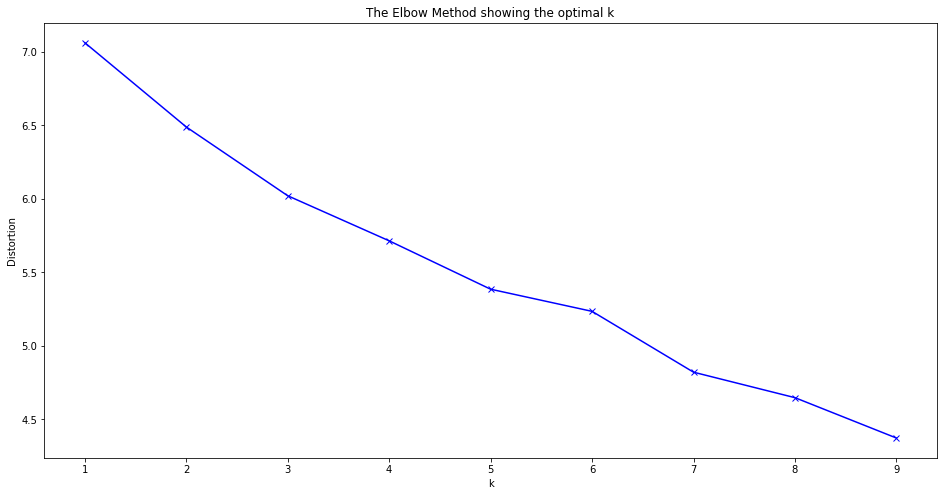

In [383]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [397]:
kclusters = 5



# run k-means clustering
kmeans_joao_pessoa_grouped = KMeans(n_clusters=kclusters, random_state=0).fit(joao_pessoa_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_joao_pessoa_grouped.labels_[0:10] 

array([4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

### Adding Clustering labels

In [398]:
joao_pessoa_venues.insert(0, 'Cluster Labels', kmeans_joao_pessoa_grouped.labels_)

joao_pessoa_merged = result

joao_pessoa_merged = joao_pessoa_merged.join(joao_pessoa_venues.set_index('Neighborhood'), on='Nome')

joao_pessoa_merged 

,Nome,Zona,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Água Fria,Sul,-7.160460,-34.857822,4.0,Café,Theme Park,Brazilian Restaurant,Diner,Snack Place,Tapiocaria,Sandwich Place,Theme Park Ride / Attraction,Acai House,Convenience Store
1,Aeroclube,Leste,-7.093488,-34.843105,4.0,Pharmacy,Skate Park,Chinese Restaurant,Coffee Shop,Pizza Place,Cosmetics Shop,Dessert Shop,Restaurant,Salon / Barbershop,Chocolate Shop
2,Altiplano,Leste,-7.130010,-34.826477,3.0,Bar,Hotel,Restaurant,Seafood Restaurant,Gym / Fitness Center,Nightclub,Café,Hotel Bar,Burger Joint,Brazilian Restaurant
3,Alto do Céu,Norte,-7.094047,-34.862049,4.0,Electronics Store,Paper / Office Supplies Store,Sandwich Place,Snack Place,Train Station,Cosmetics Shop,Steakhouse,Breakfast Spot,Department Store,Dessert Shop
4,Alto do Mateus,Oeste,-7.137515,-34.911442,1.0,Big Box Store,Food Truck,Grocery Store,Bakery,Buffet,Electronics Store,Convenience Store,Gymnastics Gym,Liquor Store,Pharmacy
5,Anatólia,Sul,-7.148797,-34.844028,3.0,Bar,Pizza Place,Acai House,Ice Cream Shop,Cosmetics Shop,Bakery,Pastelaria,Gym,Church,Café
6,Bairro das Indústrias,Sul,-7.179576,-34.920059,4.0,Churrascaria,Breakfast Spot,American Restaurant,Pizza Place,Convenience Store,Deli / Bodega,Drugstore,Dive Bar,Diner,Dessert Shop
7,Bairro dos Estados,Norte,-7.113548,-34.855289,4.0,BBQ Joint,Bakery,Gym,Yoga Studio,Dessert Shop,Pharmacy,Northeastern Brazilian Restaurant,Market,Women's Store,Buffet
8,Bairro dos Ipês,Norte,-7.100655,-34.855028,3.0,Bakery,Bar,Snack Place,Bus Stop,Beer Garden,Health & Beauty Service,Grocery Store,Arts & Crafts Store,Gym,Dance Studio
9,Bairro dos Novais,Oeste,-7.152174,-34.902898,4.0,Restaurant,Food Truck,Convenience Store,Bathing Area,Zoo,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop


### Turning Cluster Labels column into integer type

In [399]:
joao_pessoa_merged = joao_pessoa_merged.dropna()
joao_pessoa_merged['Cluster Labels'] = joao_pessoa_merged['Cluster Labels'].astype(int)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Creating map

In [400]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(joao_pessoa_merged['Latitude'], joao_pessoa_merged['Longitude'], joao_pessoa_merged['Nome'], joao_pessoa_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examinging Clusters

In [401]:
joao_pessoa_merged.loc[joao_pessoa_merged['Cluster Labels'] == 0, joao_pessoa_merged.columns[[0] + list(range(5, joao_pessoa_merged.shape[1]))]]

,Nome,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,Funcionários II,Convenience Store,Bakery,Women's Store,Event Service,Comfort Food Restaurant,Community College,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega
39,Jardim Planalto,Bakery,Gymnastics Gym,Ice Cream Shop,Pizza Place,Soccer Field,Gym,Zoo,Chinese Restaurant,Chocolate Shop,Clothing Store
50,Mumbaba,Fast Food Restaurant,Bakery,Event Service,Comfort Food Restaurant,Community College,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega


In [402]:
joao_pessoa_merged.loc[joao_pessoa_merged['Cluster Labels'] == 1, joao_pessoa_merged.columns[[0] + list(range(5, joao_pessoa_merged.shape[1]))]]

,Nome,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Alto do Mateus,Big Box Store,Food Truck,Grocery Store,Bakery,Buffet,Electronics Store,Convenience Store,Gymnastics Gym,Liquor Store,Pharmacy
22,Cuiá,Pizza Place,Snack Place,Pharmacy,Bakery,Food Stand,Food & Drink Shop,Event Service,Big Box Store,Bar,Grocery Store
25,Ernâni Sátiro,Bakery,Warehouse Store,Restaurant,Plaza,Women's Store,Dive Bar,Diner,Dessert Shop,Deli / Bodega,Cupcake Shop
49,Miramar,Big Box Store,Bakery,Grocery Store,Snack Place,Food Truck,Market,Clothing Store,Pizza Place,Plaza,Brazilian Restaurant
58,Planalto da Boa Esperança,Big Box Store,Snack Place,Office,Athletics & Sports,Soccer Stadium,Market,Dessert Shop,Electronics Store,Drugstore,Dive Bar


In [403]:
joao_pessoa_merged.loc[joao_pessoa_merged['Cluster Labels'] == 2, joao_pessoa_merged.columns[[0] + list(range(5, joao_pessoa_merged.shape[1]))]]

,Nome,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Castelo Branco,Snack Place,Juice Bar,Pool,Cafeteria,Deli / Bodega,Breakfast Spot,Women's Store,Coffee Shop,Comic Shop,Convenience Store
23,Distrito Industrial,Snack Place,Rest Area,Women's Store,Deli / Bodega,Drugstore,Dive Bar,Diner,Dessert Shop,Cupcake Shop,Empada House
47,Mangabeira,Supermarket,Snack Place,Auto Garage,Ice Cream Shop,Women's Store,Electronics Store,Drugstore,Dive Bar,Diner,Dessert Shop


In [404]:
joao_pessoa_merged.loc[joao_pessoa_merged['Cluster Labels'] == 3, joao_pessoa_merged.columns[[0] + list(range(5, joao_pessoa_merged.shape[1]))]]

,Nome,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Altiplano,Bar,Hotel,Restaurant,Seafood Restaurant,Gym / Fitness Center,Nightclub,Café,Hotel Bar,Burger Joint,Brazilian Restaurant
5,Anatólia,Bar,Pizza Place,Acai House,Ice Cream Shop,Cosmetics Shop,Bakery,Pastelaria,Gym,Church,Café
8,Bairro dos Ipês,Bakery,Bar,Snack Place,Bus Stop,Beer Garden,Health & Beauty Service,Grocery Store,Arts & Crafts Store,Gym,Dance Studio
10,Bancários,Bar,Dive Bar,Acai House,Chinese Restaurant,Ice Cream Shop,Cosmetics Shop,Japanese Restaurant,Dessert Shop,Gym,Recording Studio
14,Cabo Branco,Hotel,Bar,Food Truck,Bus Stop,Donut Shop,Brewery,Breakfast Spot,Brazilian Restaurant,Restaurant,Snack Place
34,Jardim Cidade Universitária,Ice Cream Shop,Bar,Pizza Place,Fried Chicken Joint,Seafood Restaurant,Fruit & Vegetable Store,Supermarket,Middle Eastern Restaurant,Japanese Restaurant,Bakery
35,Jardim Esther,Bar,Gym / Fitness Center,Cosmetics Shop,Restaurant,Bakery,Acai House,Snack Place,South American Restaurant,Buffet,Locksmith
36,Jardim Luna,Farm,Auto Garage,Bar,Brazilian Restaurant,Clothing Store,Electronics Store,Comic Shop,Convenience Store,Cosmetics Shop,Dance Studio
55,Paratibe,Go Kart Track,Flower Shop,Other Great Outdoors,Hotel,Cupcake Shop,Dive Bar,Diner,Dessert Shop,Deli / Bodega,Cosmetics Shop
56,Pedro Gondim,Restaurant,Gym / Fitness Center,Gastropub,Bar,Arts & Entertainment,Athletics & Sports,BBQ Joint,Seafood Restaurant,Flower Shop,Yoga Studio


In [405]:
joao_pessoa_merged.loc[joao_pessoa_merged['Cluster Labels'] == 4, joao_pessoa_merged.columns[[0] + list(range(5, joao_pessoa_merged.shape[1]))]]

,Nome,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Água Fria,Café,Theme Park,Brazilian Restaurant,Diner,Snack Place,Tapiocaria,Sandwich Place,Theme Park Ride / Attraction,Acai House,Convenience Store
1,Aeroclube,Pharmacy,Skate Park,Chinese Restaurant,Coffee Shop,Pizza Place,Cosmetics Shop,Dessert Shop,Restaurant,Salon / Barbershop,Chocolate Shop
3,Alto do Céu,Electronics Store,Paper / Office Supplies Store,Sandwich Place,Snack Place,Train Station,Cosmetics Shop,Steakhouse,Breakfast Spot,Department Store,Dessert Shop
6,Bairro das Indústrias,Churrascaria,Breakfast Spot,American Restaurant,Pizza Place,Convenience Store,Deli / Bodega,Drugstore,Dive Bar,Diner,Dessert Shop
7,Bairro dos Estados,BBQ Joint,Bakery,Gym,Yoga Studio,Dessert Shop,Pharmacy,Northeastern Brazilian Restaurant,Market,Women's Store,Buffet
9,Bairro dos Novais,Restaurant,Food Truck,Convenience Store,Bathing Area,Zoo,Candy Store,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop
12,Bessa,Ice Cream Shop,Bakery,Snack Place,Bed & Breakfast,Gym / Fitness Center,Seafood Restaurant,Japanese Restaurant,Chinese Restaurant,Café,Pharmacy
13,Brisamar,Bakery,Churrascaria,Dance Studio,Dive Bar,Restaurant,Print Shop,Northeastern Brazilian Restaurant,Electronics Store,Beer Bar,Skate Park
16,Centro,Plaza,Furniture / Home Store,Restaurant,Art Gallery,Church,Buffet,Shopping Mall,Music Venue,Motorcycle Shop,Brazilian Restaurant
17,Cidade dos Colibris,Gym,Hot Dog Joint,BBQ Joint,Sushi Restaurant,Convenience Store,Cosmetics Shop,Community College,Creperie,Comfort Food Restaurant,Event Service
